In [45]:
import cv2
import numpy as np
import imutils
import pytesseract
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import os
from PIL import Image

In [26]:
def create_text_annotations(ImgFilePath="../YOLO/CarPlates/images/", xmlFilePath="../YOLO/CarPlates/annotations/"):
    
    imgFiles = os.listdir(ImgFilePath)
    split = 0

    for imgFile in imgFiles:

        xmlFile = imgFile[:-4] + ".xml"

        tree = ET.parse(xmlFilePath + xmlFile)
        root = tree.getroot()

        img = Image.open(ImgFilePath + imgFile)
        imgWidth, imgHeight = img.size
        for obj in root.findall('object'):
            bbox = obj.find('bndbox')
            xmin = float(bbox.find('xmin').text) / imgWidth
            xmax = float(bbox.find('xmax').text) / imgWidth
            ymin = float(bbox.find('ymin').text) / imgHeight
            ymax = float(bbox.find('ymax').text) / imgHeight
        
        classID = 0
        centreX, centreY = (xmin + xmax) / 2.0, (ymin + ymax) / 2.0
        width, height = (xmax - xmin) , (ymax - ymin)
        text_file_name = "../YOLO/CarPlates/TextAnno/" + imgFile[:-4] + ".txt"
        content = str(classID) + " " + str(centreX) + " " + str(centreY) + " " + str(width) + " " + str(height)
        with open(text_file_name, "w") as f:
            f.write(content)
        
        
        # print(imgFile[:-4] + ".txt")
        # print(classID, xmin, xmax, ymin, ymax)
        
    


In [58]:
def showLicense(image, CarNumber):
    plt.imshow(image)
    plt.title(CarNumber)
    plt.show()

In [46]:
def perform_ocr(image):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

  text = pytesseract.image_to_string(thresh, config='--psm 6')  # psm 6 for single line detection
  return text


In [115]:
def getCorners(results):
    for result in results:
        boxes = result.boxes 
        bbox = np.array(results[0].boxes.xyxy.cpu())
        XMin, YMin, XMax, YMax = bbox[0][0], bbox[0][1], bbox[0][2], bbox[0][3]      
          
    return XMin, XMax, YMin, YMax
    
    # result.show()  # display to screen
    # myImg = result.plot()

In [25]:
from ultralytics import YOLO
model = YOLO('../ArnabDey/YOLO/runs/detect/train/weights/best.pt')
model.info()
myYamlfile = "../ArnabDey/YOLO/CarPlates/custom_data.yaml"

YOLOv9c summary: 618 layers, 25,530,003 parameters, 0 gradients, 103.7 GFLOPs


In [ ]:
results = model.train(data=myYamlfile, epochs=1000, imgsz=640)

In [105]:
img_testing = cv2.imread("../ArnabDey/YOLO/CarPlates/TestImages/Cars420.png")
output_results = model(img_testing)


0: 480x640 1 license_plate, 11.1ms
Speed: 3.3ms preprocess, 11.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


In [106]:
for result in output_results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    # result.show()  # display to screen
    myImg = result.plot()
    # result.save(filename="../ArnabDey/YOLO/CarPlates/result.jpg")

In [107]:
bbox = np.array(output_results[0].boxes.xyxy.cpu())
XMin, YMin, XMax, YMax = bbox[0][0], bbox[0][1], bbox[0][2], bbox[0][3]

In [108]:
top_left = (int(XMin), int(YMin))
bottom_right = (int(XMax), int(YMax))
annotated = cv2.rectangle(img_testing, top_left, bottom_right, (0, 255, 0), 2)  # Draw a green filled rectangle
# print(top_left)

110.48422 161.94336 185.19742 209.78696


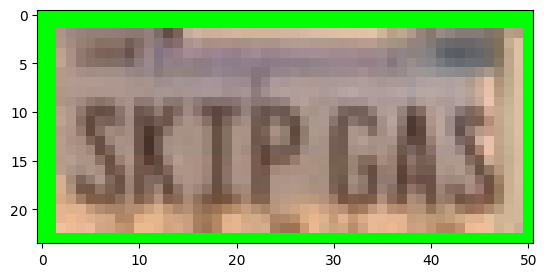

In [109]:
print(XMin, XMax, YMin, YMax)
number_plate = annotated[int(YMin):int(YMax), int(XMin):int(XMax)]
plt.imshow(number_plate)
plt.show()

In [110]:
reader = easyocr.Reader(['en'])

In [111]:
number = reader.readtext(number_plate)
_, desire, _ = number[0]
print(desire)

SkiP GAS



0: 416x640 1 license_plate, 15.3ms
Speed: 1.7ms preprocess, 15.3ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 640)


/home/kunallab/anaconda3/lib/python3.11/site-packages/torch/nn/parallel/data_parallel.py:33: UserWarning: 
    There is an imbalance between your GPUs. You may want to exclude GPU 1 which
    has less than 75% of the memory or cores of GPU 0. You can do so by setting
    the device_ids argument to DataParallel, or by setting the CUDA_VISIBLE_DEVICES
    environment variable.
  warnings.warn(imbalance_warn.format(device_ids[min_pos], device_ids[max_pos]))


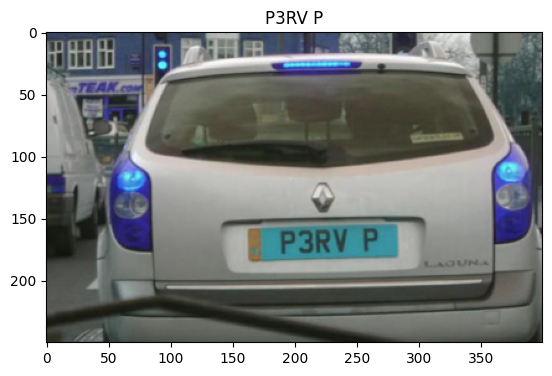


0: 480x640 1 license_plate, 15.2ms
Speed: 1.8ms preprocess, 15.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


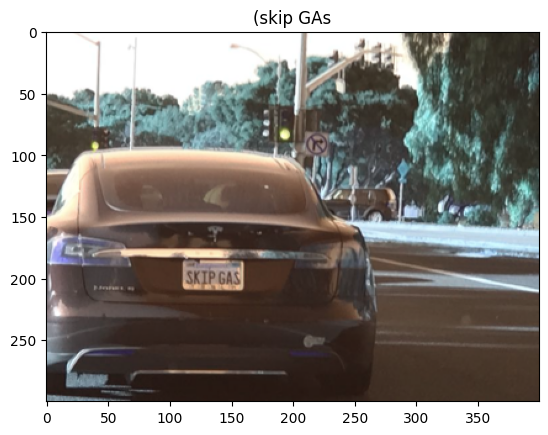


0: 320x640 1 license_plate, 16.4ms
Speed: 1.2ms preprocess, 16.4ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 640)

0: 384x640 1 license_plate, 14.1ms
Speed: 1.3ms preprocess, 14.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 license_plate, 13.4ms
Speed: 1.4ms preprocess, 13.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


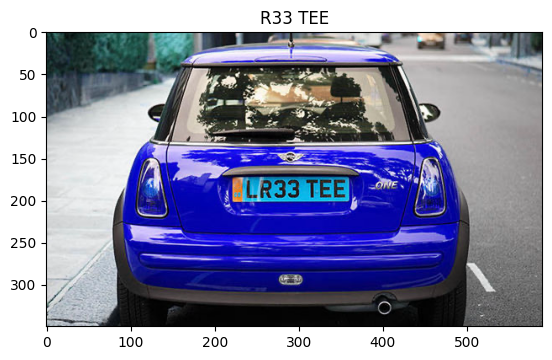


0: 480x640 1 license_plate, 15.8ms
Speed: 1.8ms preprocess, 15.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


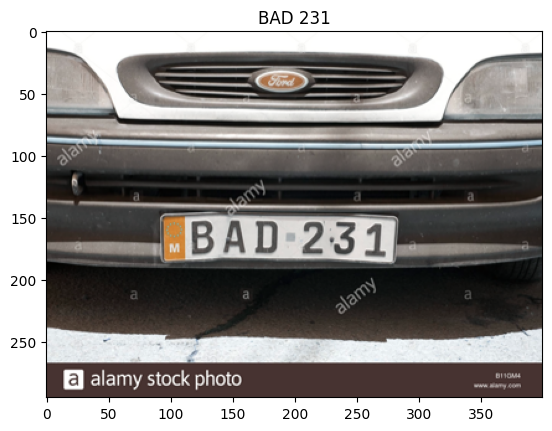


0: 480x640 1 license_plate, 15.6ms
Speed: 2.0ms preprocess, 15.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 384x640 1 license_plate, 14.0ms
Speed: 1.3ms preprocess, 14.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


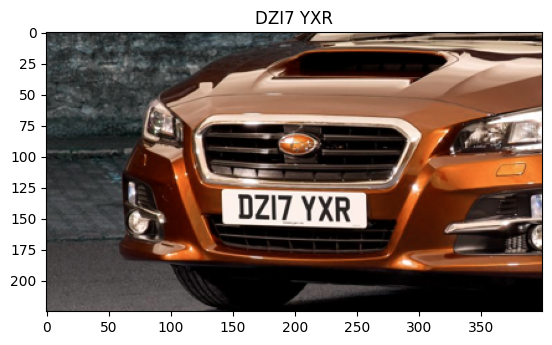


0: 384x640 1 license_plate, 14.3ms
Speed: 1.5ms preprocess, 14.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 448x640 1 license_plate, 14.1ms
Speed: 1.5ms preprocess, 14.1ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)

0: 576x640 2 license_plates, 14.2ms
Speed: 1.9ms preprocess, 14.2ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 640)


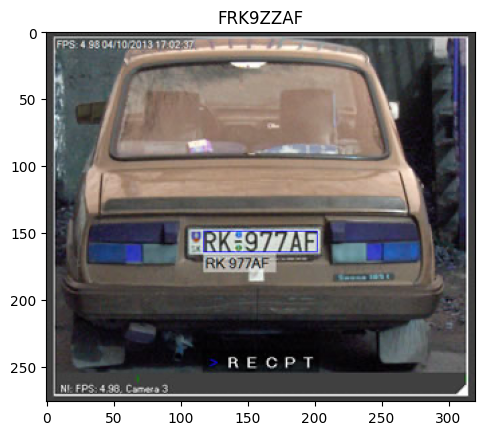


0: 416x640 1 license_plate, 15.3ms
Speed: 1.7ms preprocess, 15.3ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 640)


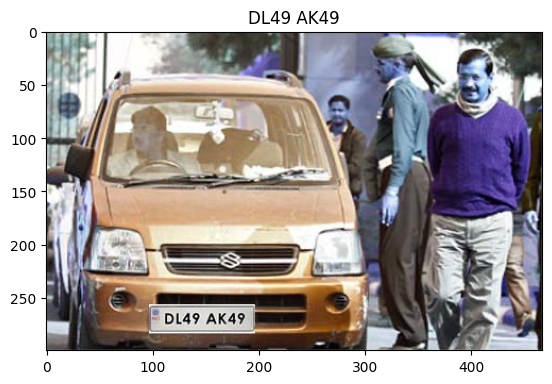


0: 384x640 1 license_plate, 14.8ms
Speed: 1.5ms preprocess, 14.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 448x640 1 license_plate, 14.2ms
Speed: 1.7ms preprocess, 14.2ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


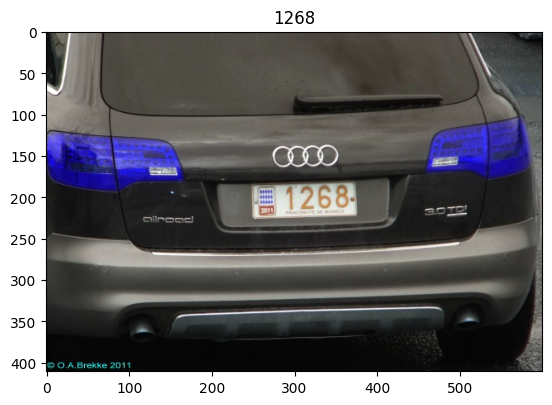


0: 640x512 1 license_plate, 14.9ms
Speed: 1.9ms preprocess, 14.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 512)


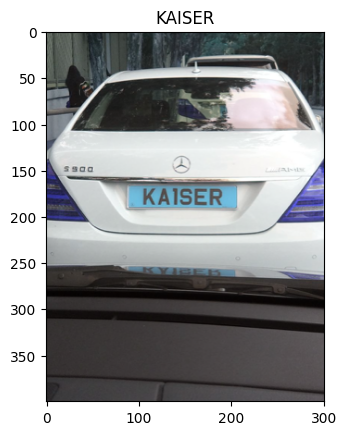


0: 512x640 2 license_plates, 14.8ms
Speed: 1.9ms preprocess, 14.8ms inference, 0.9ms postprocess per image at shape (1, 3, 512, 640)


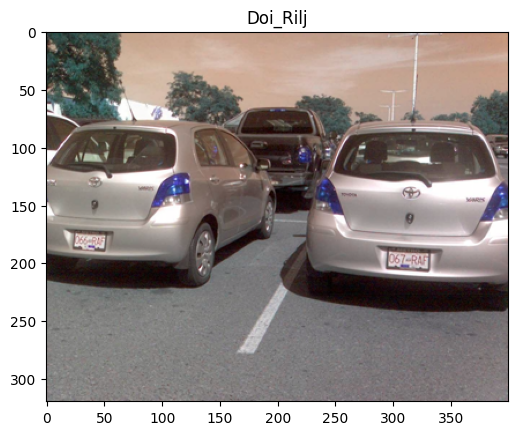


0: 448x640 1 license_plate, 15.1ms
Speed: 1.8ms preprocess, 15.1ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)

0: 384x640 1 license_plate, 14.0ms
Speed: 1.4ms preprocess, 14.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


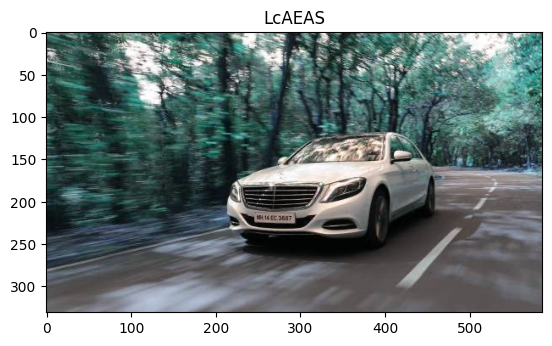


0: 448x640 1 license_plate, 14.9ms
Speed: 1.7ms preprocess, 14.9ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


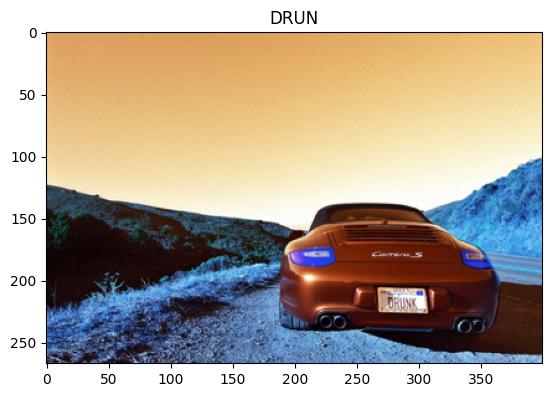


0: 320x640 1 license_plate, 14.8ms
Speed: 1.2ms preprocess, 14.8ms inference, 0.9ms postprocess per image at shape (1, 3, 320, 640)


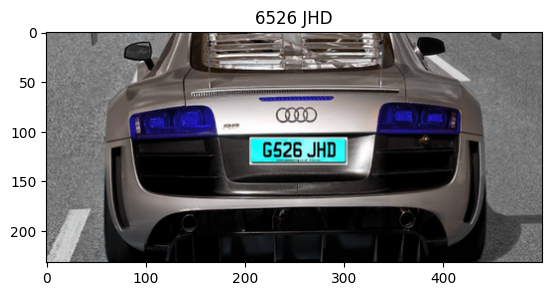


0: 480x640 1 license_plate, 14.7ms
Speed: 1.7ms preprocess, 14.7ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 384x640 1 license_plate, 13.6ms
Speed: 1.3ms preprocess, 13.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


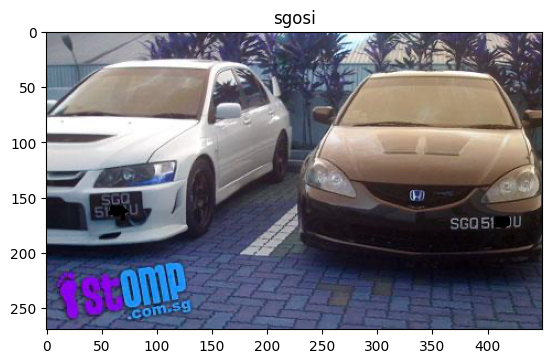


0: 640x608 1 license_plate, 15.3ms
Speed: 2.3ms preprocess, 15.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 608)


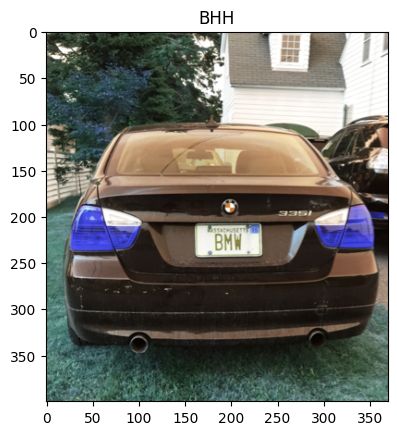


0: 480x640 1 license_plate, 14.7ms
Speed: 1.9ms preprocess, 14.7ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


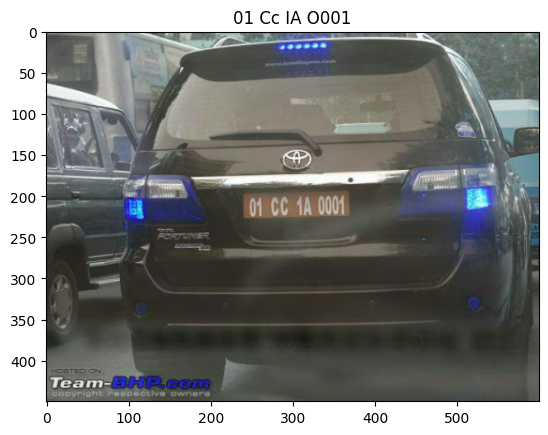


0: 480x640 1 license_plate, 14.3ms
Speed: 1.7ms preprocess, 14.3ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


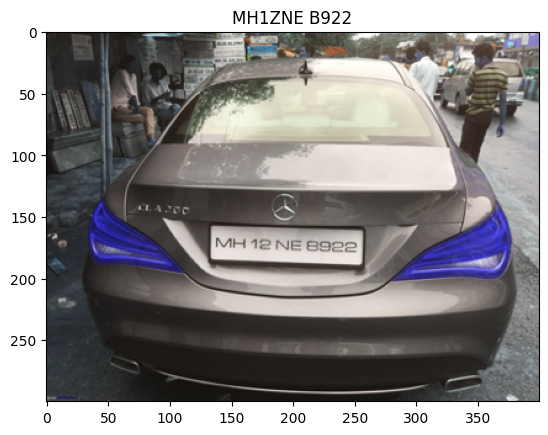


0: 416x640 1 license_plate, 14.9ms
Speed: 1.5ms preprocess, 14.9ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 640)

0: 480x640 1 license_plate, 14.2ms
Speed: 1.7ms preprocess, 14.2ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 448x640 1 license_plate, 14.3ms
Speed: 1.6ms preprocess, 14.3ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


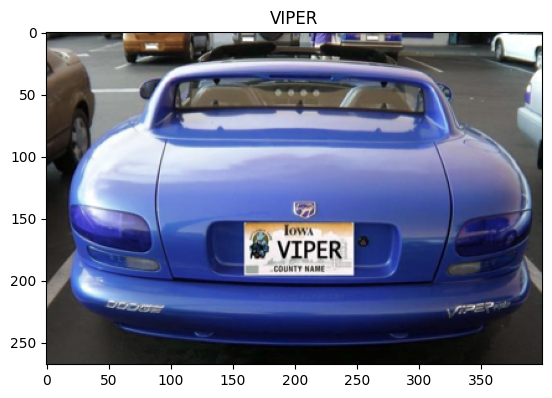


0: 480x640 1 license_plate, 15.1ms
Speed: 1.8ms preprocess, 15.1ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


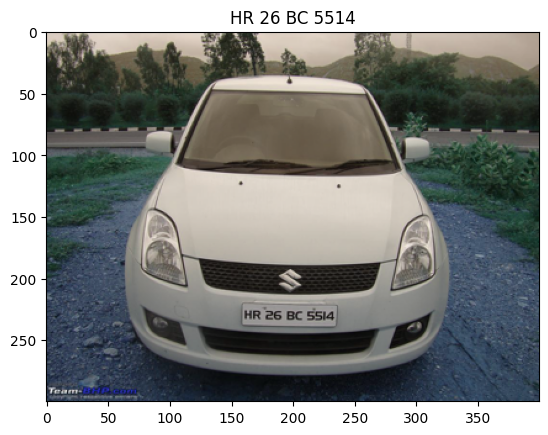


0: 480x640 1 license_plate, 14.4ms
Speed: 1.7ms preprocess, 14.4ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


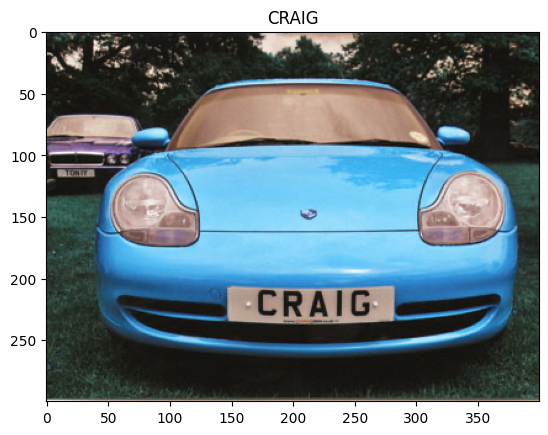


0: 640x512 1 license_plate, 14.7ms
Speed: 2.0ms preprocess, 14.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 512)

0: 576x640 1 license_plate, 14.3ms
Speed: 2.0ms preprocess, 14.3ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 640)


In [120]:
testFiles = os.listdir("../ArnabDey/YOLO/CarPlates/TestImages")
reader = easyocr.Reader(['en'])

for testFile in testFiles:
    if testFile[-4:] == '.png':
        imageFilePath = "../ArnabDey/YOLO/CarPlates/TestImages/" + testFile
        image = cv2.imread(imageFilePath)

        output = model(image)

        Xmin, Xmax, Ymin, Ymax = getCorners(output)
        # print(Xmin, Xmax, Ymin, Ymax)
        
        # top_left = (int(Xmin), int(Ymin))
        # bottom_right = (int(Xmax), int(Ymax))
        # annotated = cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)  # Draw a green filled rectangle

        number_plate = image[int(Ymin):int(Ymax), int(Xmin):int(Xmax)]
        # plt.imshow(number_plate)
        # plt.show()
        number = reader.readtext(number_plate)
        if(len(number) == 1):
            _, desire, _ = number[0]
            showLicense(image, desire)